---
title: Matplotlib 3D
tags: [jupyter]
keywords: dataVis, matplotlib
summary: "Creating 3D images in matplotlib"
mlType: dataVis
infoType: matplotlib
sidebar: dataVis_sidebar
permalink: __AutoGenThis__
notebookfilename:  __AutoGenThis__
---

Check this [cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf) for a more detailed look.

# Imports

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
from mpl_toolkits import mplot3d

# I/O

For the purpose of this notebok lets use the **Laplacian of Gaussian** function defined by:

$$\operatorname{LoG}(x,y) = \frac{1}{\pi\sigma^4}\left(\frac{x^2+y^2}{2\sigma^2} - 1\right)e^{-\frac{x^2+y^2}{2\sigma^2}}$$

In [4]:
def LoG(x=[0], y=[0], sigma=8):
    temp = (x ** 2 + y ** 2) / (2 * sigma ** 2)
    return -1 / (np.pi * sigma ** 4) * (1 - temp) * np.exp(-temp)

Lets create a **49x49** matrix with $\sigma=8$

In [6]:
N = 49
n_2 = N // 2
x, y = np.meshgrid(range(N),range(N))
sigma = 8

z = -LoG(x=x-n_2,
         y=y-n_2,
        sigma=sigma)

# some extra replotting
x1 = np.reshape(x,-1)
y1 = np.reshape(y,-1)
z1 = np.reshape(z,-1)

# Plotting

To draw 3D plots you must first create a 3D projection axes in which you wish to draw you stuff on.  To do this you can:

> ```python
> ax = axes(projection='3D')
> ```

After that you can use the following commands to draw them:

- plot_wireframe
- plot_surface
- scatter
- contour3D
- plot_trisurf
    - the points must be 1D

## Showcase of Common Methods

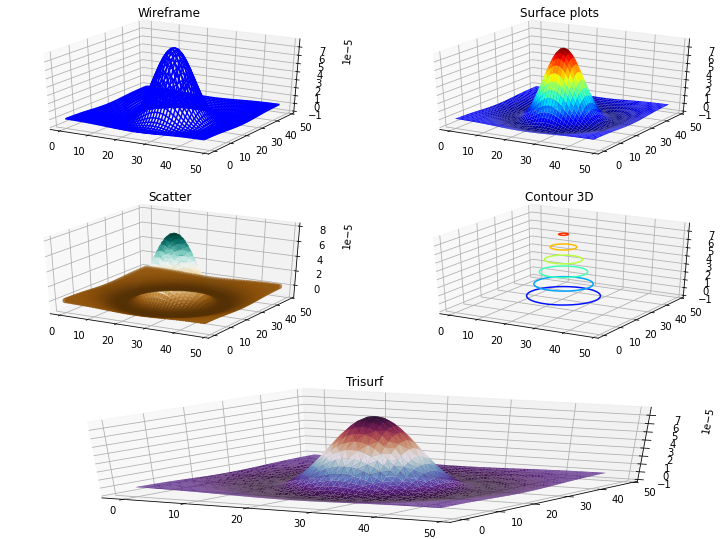

In [22]:
plt.figure(figsize=(12.8,9.6))

# wireframe
ax = plt.subplot2grid((3,2),(0,0),colspan=1,rowspan=1,projection='3d')
ax.plot_wireframe(x,y,z,color='b')
ax.set_title('Wireframe')

# Surface plots
ax = plt.subplot2grid((3,2),(0,1),colspan=1,rowspan=1,projection='3d')
ax.plot_surface(x,y,z,cmap='jet')
ax.set_title('Surface plots')

# Scatter
ax = plt.subplot2grid((3,2),(1,0),colspan=1,rowspan=1,projection='3d')
ax.scatter(x,y,z,c=z,cmap='BrBG',linewidth=1)
ax.set_title('Scatter')

# Contour 3D
ax = plt.subplot2grid((3,2),(1,1),colspan=1,rowspan=1,projection='3d')
ax.contour3D(x,y,z,cmap='jet')
ax.set_title('Contour 3D')

# Trisurf
ax = plt.subplot2grid((3,2),(2,0),colspan=2,rowspan=1,projection='3d')
ax.plot_trisurf(x1,y1,z1,cmap='twilight_shifted')
ax.set_title('Trisurf')

plt.show()

## Trisurf Special Case for 3D Objects

The trisurf method can be used to decompose any object in 3D space using triangles.  So lets do this with **.obj** file.

In [24]:
def read_obj(filename):
    triangles = []
    vertices = []
    with open(filename) as file:
        for line in file:
            components = line.strip(' \n').split(' ')
            if components[0] == "f": # face data
                # e.g. "f 1/1/1/ 2/2/2 3/3/3 4/4/4 ..."
                indices = list(map(lambda c: int(c.split('/')[0]) - 1, components[1:]))
                for i in range(0, len(indices) - 2):
                    triangles.append(indices[i: i+3])
            elif components[0] == "v": # vertex data
                # e.g. "v  30.2180 89.5757 -76.8089"
                vertex = list(map(lambda c: float(c), components[1:]))
                vertices.append(vertex)
    return np.array(vertices), np.array(triangles)

In [26]:
teapotLocation = 'C:/Cerebral/_MarioSandBox/DB/mlPlayground/teapot.obj'

In [27]:
vertices, triangles = read_obj(teapotLocation)

In [29]:
x = vertices[:,0]
y = vertices[:,1]
z = vertices[:,2]

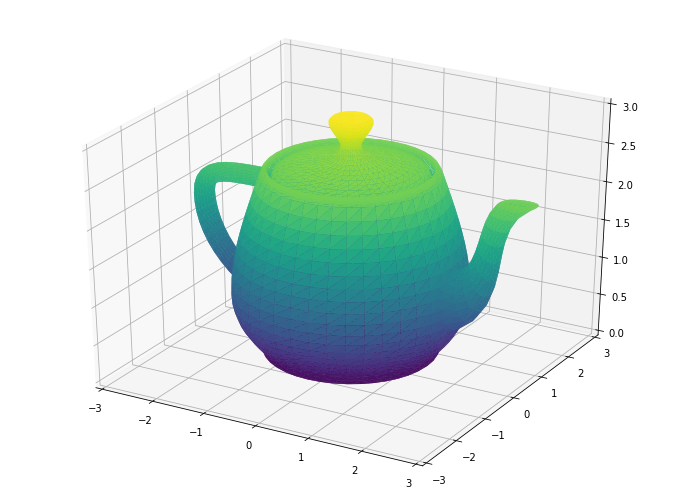

In [31]:
plt.figure(figsize=(12,9))

ax = plt.axes(projection='3d')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])
ax.plot_trisurf(x, z, triangles, y, shade=True, cmap='viridis')